In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline

# Exploration des données

On importe le dataset

In [2]:
data = pd.read_csv("Exemple_Base_Client.csv")

In [3]:
data.dtypes

Client_ID                  object
Sexe                       object
Age                       float64
Navigateur                 object
OS                         object
Pays                       object
Geolocalisation            object
Campagne                     bool
Moyenne_Pages_Visitees    float64
Haut_Revenu                  bool
dtype: object

On affiche un extrait

In [4]:
data.head()

,Client_ID,Sexe,Age,Navigateur,OS,Pays,Geolocalisation,Campagne,Moyenne_Pages_Visitees,Haut_Revenu
0,6555,M,42.0,Chrome,Windows,United States,-78.3875 36.6676,False,12.333333,False
1,13226,F,18.0,Chrome,Windows,Belgium,4.35 50.85,False,6.000000,False
2,24448,F,71.0,Chrome,Windows,Japan,139.7677 35.6427,False,9.500000,False
3,31876,M,54.0,Chrome,MacOS X,Sweden,12.6944 56.0467,True,10.333333,False
4,39768,F,NaN,Chrome,Windows,United States,-83.7834 40.1183,False,11.000000,False


In [5]:
data.loc[data['Haut_Revenu']==True].shape

(993, 10)

On plot la distribution entre des differentes variables

In [6]:
data.shape

(10787, 10)

In [7]:
data.loc[data['Haut_Revenu']==True].shape[0]/data.shape[0]

0.0920552516918513

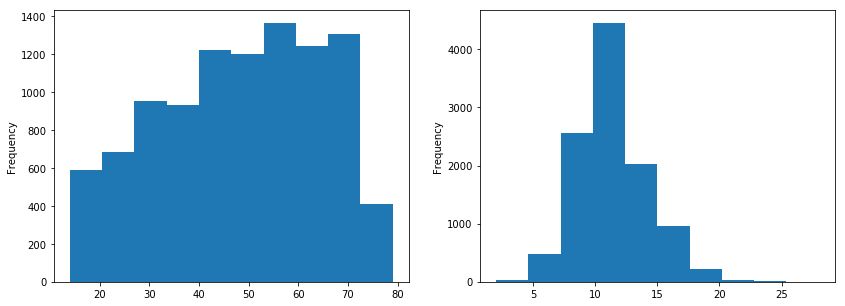

In [8]:
fig = plt.figure()
data.iloc[:,2].plot(kind='hist', figsize=(14,5), ax=fig.add_subplot(121))
data.iloc[:,8].plot(kind='hist', figsize=(14,5), ax=fig.add_subplot(122))

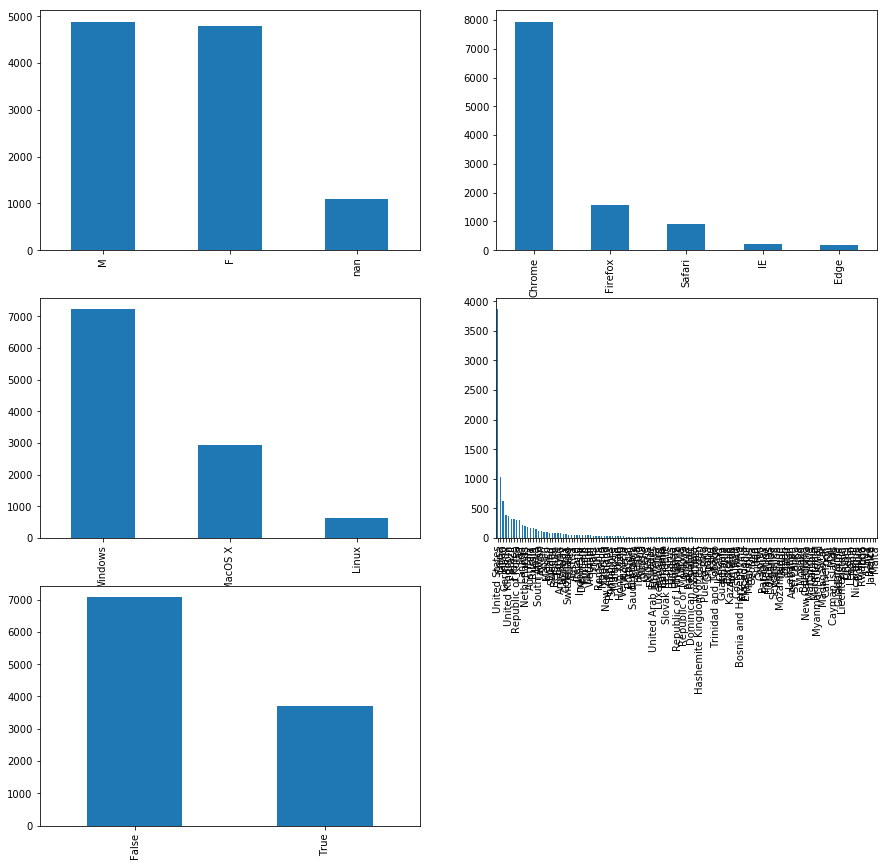

In [9]:
fig = plt.figure()
ind=0
for i  in (1,3,4,5,7):
    ind+=1
    ax = fig.add_subplot(32*10+ind)
    data.iloc[:,i].value_counts(dropna=False).plot(kind='bar', ax=ax, figsize=(15,15))

On remarque que les USA domine la variable Pays. Donc il serais plus pratique de convertire cette variable en une variable booleanne qui categorise USA/OutUSA

In [10]:
data.isnull().sum()

Client_ID                    0
Sexe                      1100
Age                        891
Navigateur                   0
OS                           0
Pays                       297
Geolocalisation            273
Campagne                     0
Moyenne_Pages_Visitees       0
Haut_Revenu                  0
dtype: int64

On remarque qu'il y a asset de données manquantes dans les colonnes Sexe, Age, Pays, et Geo.
On tachera de les remplir de façon approprier en suite.

# Traitement des données

subdivision de Geolocalisation en latitude et longitude 

In [11]:
geoSplit=pd.DataFrame(data['Geolocalisation'].str.split(' ',1, expand=True))
geoSplit = geoSplit.rename(columns={0:'lat',1:'long'})
data = pd.concat([data.iloc[:,0:6],geoSplit,data.iloc[:,7:10]], axis=1)

In [12]:
data.head()

,Client_ID,Sexe,Age,Navigateur,OS,Pays,lat,long,Campagne,Moyenne_Pages_Visitees,Haut_Revenu
0,6555,M,42.0,Chrome,Windows,United States,-78.3875,36.6676,False,12.333333,False
1,13226,F,18.0,Chrome,Windows,Belgium,4.35,50.85,False,6.000000,False
2,24448,F,71.0,Chrome,Windows,Japan,139.7677,35.6427,False,9.500000,False
3,31876,M,54.0,Chrome,MacOS X,Sweden,12.6944,56.0467,True,10.333333,False
4,39768,F,NaN,Chrome,Windows,United States,-83.7834,40.1183,False,11.000000,False


On remplis les valeurs numeriques manquantes 

In [13]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [14]:
data['lat']=pd.to_numeric(data['lat'])
data['long']=pd.to_numeric(data['long'])

In [15]:
data['lat']=data['lat'].fillna(data['lat'].mean())
data['long']=data['long'].fillna(data['long'].mean())

In [16]:
data['Pays']=data['Pays']=='United States'

In [17]:
data['Sexe']=data['Sexe'].fillna('X')

In [18]:
data.isnull().sum()

Client_ID                 0
Sexe                      0
Age                       0
Navigateur                0
OS                        0
Pays                      0
lat                       0
long                      0
Campagne                  0
Moyenne_Pages_Visitees    0
Haut_Revenu               0
dtype: int64

In [19]:
#data['Age']=(data['Age']-data['Age'].mean())/data['Age'].std()
data['lat']=(data['lat']-data['lat'].mean())/data['lat'].std()
data['long']=(data['long']-data['long'].mean())/data['long'].std()
data['Moyenne_Pages_Visitees']=(data['Moyenne_Pages_Visitees']-data['Moyenne_Pages_Visitees'].mean())/data['Moyenne_Pages_Visitees'].std()

In [20]:
data['Pays']=data['Pays'].astype('int32')
data['Campagne']=data['Campagne'].astype('int32')
data['Haut_Revenu']=data['Haut_Revenu'].astype('int32')

In [21]:
data.head()

,Client_ID,Sexe,Age,Navigateur,OS,Pays,lat,long,Campagne,Moyenne_Pages_Visitees,Haut_Revenu
0,6555,M,42.000000,Chrome,Windows,1,-0.831011,0.154554,0,0.375381,0
1,13226,F,18.000000,Chrome,Windows,0,0.122707,0.859386,0,-1.930742,0
2,24448,F,71.000000,Chrome,Windows,0,1.683671,0.103619,0,-0.656306,0
3,31876,M,54.000000,Chrome,MacOS X,0,0.218893,1.117649,1,-0.352869,0
4,39768,F,48.028193,Chrome,Windows,1,-0.893210,0.326045,0,-0.110119,0


In [22]:
data.shape

(10787, 11)

In [23]:
data2 = pd.concat([data['Client_ID'], pd.get_dummies(data.iloc[:,1:-1]), data['Haut_Revenu']], axis=1)

In [24]:
data2.dtypes

Client_ID                  object
Age                       float64
Pays                        int32
lat                       float64
long                      float64
Campagne                    int32
Moyenne_Pages_Visitees    float64
Sexe_F                      uint8
Sexe_M                      uint8
Sexe_X                      uint8
Navigateur_Chrome           uint8
Navigateur_Edge             uint8
Navigateur_Firefox          uint8
Navigateur_IE               uint8
Navigateur_Safari           uint8
OS_Linux                    uint8
OS_MacOS X                  uint8
OS_Windows                  uint8
Haut_Revenu                 int32
dtype: object

In [25]:
data2 = data2.iloc[:,1:19].astype('float32')

In [26]:
data2.head()

,Age,Pays,lat,long,Campagne,Moyenne_Pages_Visitees,Sexe_F,Sexe_M,Sexe_X,Navigateur_Chrome,Navigateur_Edge,Navigateur_Firefox,Navigateur_IE,Navigateur_Safari,OS_Linux,OS_MacOS X,OS_Windows,Haut_Revenu
0,42.000000,1.0,-0.831011,0.154554,0.0,0.375381,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,18.000000,0.0,0.122707,0.859386,0.0,-1.930742,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,71.000000,0.0,1.683671,0.103619,0.0,-0.656306,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,54.000000,0.0,0.218893,1.117649,1.0,-0.352869,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,48.028194,1.0,-0.893210,0.326045,0.0,-0.110119,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
data3 = data2.drop(['lat', 'long','Navigateur_Chrome','Navigateur_Edge','Navigateur_Firefox','Navigateur_IE','Navigateur_Safari'], axis=1)

# ANN

Echantillonage aléatoires du dataset en **training**, **validation** et **test**

In [28]:
train, test = train_test_split(data3, test_size=0.2)

In [29]:
train, valid = train_test_split(train, test_size=0.063)

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
clf = RandomForestClassifier()


In [32]:
train.iloc[:,:-1]

,Age,Pays,Campagne,Moyenne_Pages_Visitees,Sexe_F,Sexe_M,Sexe_X,OS_Linux,OS_MacOS X,OS_Windows
9481,47.000000,1.0,0.0,-0.110119,1.0,0.0,0.0,0.0,0.0,1.0
346,48.028194,0.0,0.0,-0.595618,1.0,0.0,0.0,0.0,0.0,1.0
1452,41.000000,0.0,0.0,0.618130,0.0,0.0,1.0,0.0,0.0,1.0
1982,20.000000,0.0,1.0,2.074629,0.0,1.0,0.0,0.0,1.0,0.0
8709,65.000000,1.0,0.0,-0.838368,0.0,1.0,0.0,0.0,0.0,1.0
2929,24.000000,1.0,1.0,-1.930742,0.0,0.0,1.0,0.0,0.0,1.0
4492,59.000000,0.0,1.0,0.108356,0.0,1.0,0.0,0.0,0.0,1.0
1819,67.000000,0.0,1.0,0.345037,1.0,0.0,0.0,0.0,1.0,0.0
8561,35.000000,1.0,1.0,0.739505,0.0,0.0,1.0,0.0,0.0,1.0
6028,18.000000,1.0,0.0,0.254006,1.0,0.0,0.0,0.0,0.0,1.0


In [33]:
X = train.iloc[:,:-1]
y = train.iloc[:,-1]
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [34]:
print(clf.feature_importances_)

[ 0.40259698  0.02536     0.05945564  0.46663781  0.00746167  0.00784905
  0.0064248   0.00561986  0.0088905   0.0097037 ]


In [35]:
predicted = clf.predict(test.iloc[:,:-1])

In [36]:
trueVals = test.iloc[:,-1].values

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(trueVals, predicted)

array([[1895,   56],
       [ 183,   24]])